# Chapter 7. Identifying Similar Groups in Data

In many applications, we want to cluster observations into similar groups based on observed features. For example, in marketing, it is common to divide potential customers into groups for the purposes of targeting. (For example, a business might want to target a campaign at a group that is most likely to respond to the campaign.) This practice is known as **market segmentation**.

This chapter is about how to automatically identify clusters in data, a problem known as **clustering**. Like the classification problems we examined in the previous chapter, clustering is about dividing observations into categories based on features. Unlike classification, however, we do not have ground truth labels that specify what the categories should be; we have to infer them automatically from data. In other words, with classification, we have both features $X$ and labels $y$; with clustering, we only have the features $X$.

For this reason, clustering is an example of an **unsupervised learning** problem, in contrast to the **supervised learning** problems of the previous chapters. This unsupervised / supervised terminology comes from the following analogy.  Imagine a child that is trying to learn the difference between shapes and has several examples of each shape in front of him.

<img src="shape_sorter.jpg" />

The child may be _supervised_ by an adult who gives the child feedback on each answer: "Yes, that is a circle....No, that was a square....No, that was a circle."  This process is analogous to classification, where the labels in the training data can be used to evaluate how good the model's predictions are.

On the other hand, the child may be _unsupervised_ and completely left to his own devices. Eventually, he may figure out that there is something similar about all of the circles that distinguish them from the squares. But he won't know that they are called "circles", nor does he have any way of evaluating whether he is right or not. This is the fundamental challenge of clustering.

We will practice clustering on a dataset containing measurements of 150 iris flowers, collected by the statistician R. A. Fisher.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.max_rows = 5

iris = pd.read_csv("../data/iris.csv")
iris

SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]

Let's focus on just two of the variables: the petal length and width. The reason for choosing just two variables is so that we can easily visualize the data. Based on the scatterplot below, how many clusters do you think there are in this data set? Can you invent an algorithm that would automatically identify those clusters?

In [4]:
iris.Name.unique()

iris["color"] = iris.Name.map({"Iris-setosa": "green", "Iris-versicolor":"blue",
                              "Iris-virginica":"red"})

<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

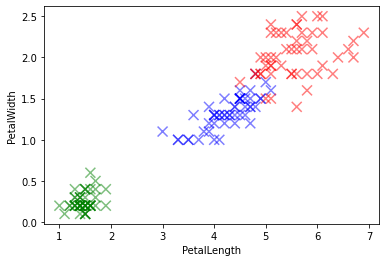

In [7]:
X_train = iris[["PetalLength", "PetalWidth"]]

X_train.plot.scatter(x="PetalLength", y="PetalWidth", s=100, marker='x', alpha=0.5, 
                c= iris["color"])


<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

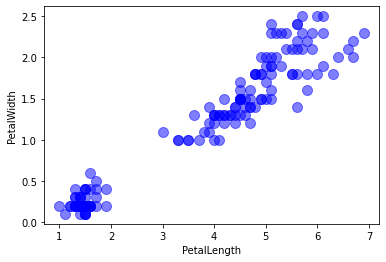

In [8]:

X_train.plot.scatter(x="PetalLength", y="PetalWidth", 
                     c="blue", s=100, alpha=.5)

# Chapter 7.1 $K$-Means Clustering

$K$-means is an algorithm for finding clusters in data. The idea behind $k$-means is simple: each cluster has a "center" point called the **centroid**, and each observation is associated with the cluster of its closest centroid. The only challenge is finding those centroids. The $k$-means algorithm starts with a random guess for the centroids and iteratively improves them.

The steps are as follows:

1. Initialize $k$ centroids at random.
2. Assign each point to the cluster of its nearest centroid.
3. (After the reassignment, the centroid may no longer be at the center of its cluster.) Recompute each centroid based on the points assigned to its cluster.
4. Repeat steps 2 and 3 until no points change clusters.

Let's see how this works in code. First, let's sample 3 points from the data at random to serve as the initial centroids.

In [11]:
# Initialize 3 centroids at random from the data.
centroids = X_train.sample(3)  ### random!!!!

# Call the three clusters "red", "blue", "ygreen" for convenience.
centroids.index = ["g", "r", "b"]

centroids

PetalLength  PetalWidth
g          5.0         1.7
r          4.4         1.3
b          3.7         1.0

<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

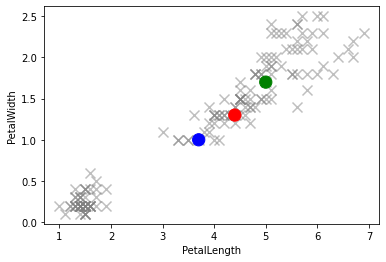

In [14]:
# Let's plot these centroids.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth", 
                          c="grey", marker='x', s=100, alpha=.5)
centroids.plot.scatter(x="PetalLength", y="PetalWidth", s=150,
                       c=centroids.index, ax=ax)

###centroids

Now we assign each point to the cluster of its nearest centroid.

In [20]:
# First, define a function that finds the closest centroid to 
# a given observation.
def get_closest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

#X_train.loc[100], centroids, 
get_closest_centroid(X_train.loc[112])

'g'

In [24]:
# Apply the function to the entire data set.
clusters = X_train.apply(get_closest_centroid, axis=1)

clusters

0      b
1      b
      ..
148    g
149    g
Length: 150, dtype: object

<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

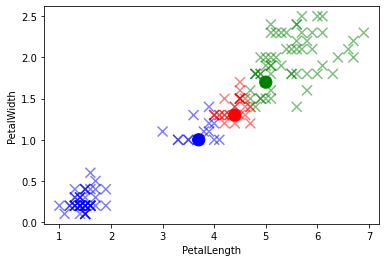

In [25]:

# Plot the cluster assignments.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth", 
                          c=clusters, marker="x", alpha=.5, s=100)
centroids.plot.scatter(x="PetalLength", y="PetalWidth", 
                       c=centroids.index, ax=ax, s=150)

In [26]:
oldCentroids = centroids

# Calculate the mean length and width for each cluster.
centroids = X_train.groupby(clusters).mean()Notice that some of the centroids are no longer at the center of their clusters. We can fix that by redefining the centroid to be the mean of the points in its cluster.

In [29]:
# Calculate the mean length and width for each cluster.
centroids = X_train.groupby(clusters).mean()

centroids, oldCentroids


(   PetalLength  PetalWidth
 b     1.948438    0.431250
 g     5.473684    1.968421
 r     4.382759    1.379310,
    PetalLength  PetalWidth
 g          5.0         1.7
 r          4.4         1.3
 b          3.7         1.0)

<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

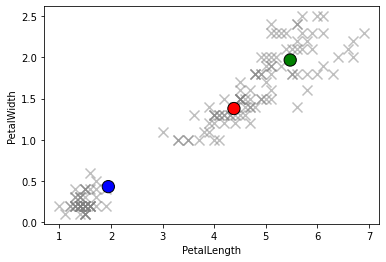

In [36]:

# Let's plot the new centroids.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth", 
                          c="grey", marker="x", alpha=.5, s= 100)
centroids.plot.scatter(x="PetalLength", y="PetalWidth", 
                       c=centroids.index, ax=ax, s=150, edgecolors="black")
#oldCentroids.plot.scatter(x="PetalLength", y="PetalWidth", 
#                       c= ['g','r',
#                          'b'], marker = "v", ax=ax, s=100, edgecolors="black")




Now, there may be some points that are no longer assigned to their closest centroid, so we have to go back and re-assign clusters. But that may cause the centroids to no longer be at the center of their cluster, so we have to recalculate the centroids. And so on. This process continues until the cluster assignments stop changing.

<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

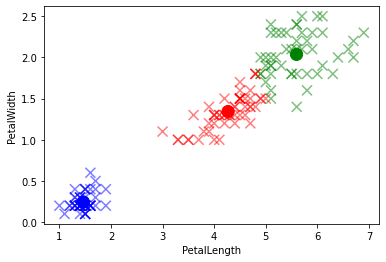

In [40]:
# Assign points to their closest centroid.
clusters = X_train.apply(get_closest_centroid, axis=1)

# Recalculate the centroids based on the clusters.
centroids = X_train.groupby(clusters).mean()

# Plot.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth", 
                          c=clusters, marker="x", alpha=.5, s= 100)
centroids.plot.scatter(x="PetalLength", y="PetalWidth", 
                       c=centroids.index, ax=ax, s=150)

In [42]:
clusters.value_counts()

r    52
b    50
g    48
dtype: int64

We can run the above code over and over until the clusters stop changing. This is the final cluster assignment.

It is not so easy to visualize the clusters when there are more than 2 features. But we can wrap the same algorithm inside a loop that continues until the cluster assignments do not change from one step to the next. One of the optional exercises below walks you through such an implementation.

However, we rarely need to implement $k$-means from scratch. This is because $k$-means is implemented in Scikit-Learn. The API for Scikit-Learn's $k$-means model is similar to the API for supervised learning models, like $k$-nearest neighbors, except that the `.fit()` method only takes in `X`, not `X` and `y`. This makes sense because in unsupervised learning, there are no ground truth labels `y`.

K-Means clustering in Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [43]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='random')
model.fit(X_train)

KMeans(init='random', n_clusters=3)

In [47]:
# Extract the centroids and the clusters.
iters = model.n_iter_
centroids = model.cluster_centers_
clusters = model.labels_

iters,clusters

(10,
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32))

In [48]:
# Map the cluster numbers to colors.
cClusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "g"
})


cClusters

0      g
1      g
      ..
148    b
149    b
Length: 150, dtype: object

<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

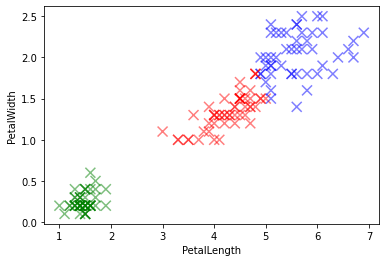

In [49]:
# Plot the data
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=cClusters, s = 100, marker="x", alpha=.5)

For clustering algorithms, the `predict` method also exists. It returns the cluster/clusters assigned to the input data point/points

In [52]:
model.predict([[5, 1.6]])

array([1], dtype=int32)

### A Note about Standardization

Note that we did not standardize the variables in the example above. Just as with $k$-nearest neighbors, it is generally a good idea to standardize your variables before applying $k$-means. Let's see how different the clusters would be if the variables had been standardized.

<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

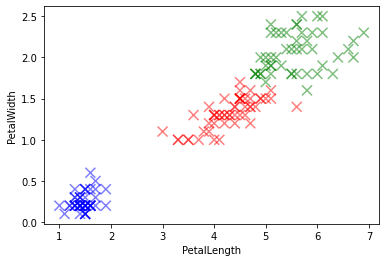

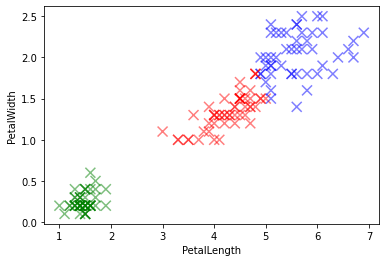

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

model = KMeans(n_clusters=3, init='random')
model.fit(X_train_std)

csClusters = pd.Series(model.labels_).map({
    0: "r",
    1: "b",
    2: "g"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth", 
                     c=csClusters, marker="x", s=100, alpha=.5)
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=cClusters, s = 100, marker="x", alpha=.5)

Let's compare these clusters to the ones we obtained above, keeping in mind that the coloring of the clusters is arbitrary. (All that matters is which observations are grouped together.) We see that only a handful observations near the boundary actually change cluster.  Standardization turns out not to matter much for the iris dataset because the variables are on similar scales. But in data sets with variables on different scales, standardization is crucial.

# Exercises

**Exercise 0** Combine the K-means clustering code from this notebook into a single function 

In [60]:
def kMeans(X, k):
   
### your code goes here

    return

where `X` is the input data frame containing the data points to be clustered, and `k` is the number of clusters to create.

The `kMeans` function shall return a `pandas.Series` object with the same index as `X`, assigning to each row a number from `0` to `k-1` representing the cluster assignment.

Use Eucledean distance.  You can define any helper functions you want along the way.


Apply your function to the clustering problem we did in class for `k` = 4, 5, 6, and for each application, visualize the results using a scatter plot.

**Exercise 1.** Use $k$-means to cluster the wines in the wines dataset into 2 clusters. (Code to read in this dataset has been provided below.) How well do your two clusters correspond to white and red wines? (The way the dataset is read in below, the first 1599 wines are red, and the rest are white.)

_Hint:_ Don't forget to standardize your variables first!

You can use your own implementation of `kMeans()` here or the `sklean` version.


In [55]:
# TYPE YOUR CODE HERE.
red = pd.read_csv("../data/wines/reds.csv", sep=";")
white = pd.read_csv("../data/wines/whites.csv", sep=";")
wines = pd.concat([red, white], ignore_index=True)

wines


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
...             ...               ...          ...             ...        ...   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
...                   ...                   ...      ...   ...        ...   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
...       ...      ...  
6495     12.8        7  
6496     11.8        6  

[6497 rows x 12 columns]

**Exercise 2.** Use $k$-means to cluster the Titanic passengers (`../data/titanic.csv`) into $k$ clusters. You are free to choose the number of clusters $k$ and the features to include (but be sure to include both categorical and quantitative features). Look at the profiles of the passengers in each cluster. Can you come up with an "interpretation" of each cluster based on the passengers in it?

You can use your own implementation of `kMeans()` here or the `sklean` version.


In [ ]:
# TYPE YOUR CODE HERE.

**Explain your observations**

**Exercise 3.** The code below reads in the "two moons" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What should be the two clusters be _intuitively_? What do you think $k$-means will return as the clusters? Once you have a hypothesis, test it out by fitting the model to this dataset and plotting the resulting clusters.

You can use the `sklean` version here.


<AxesSubplot:xlabel='x1', ylabel='x2'>

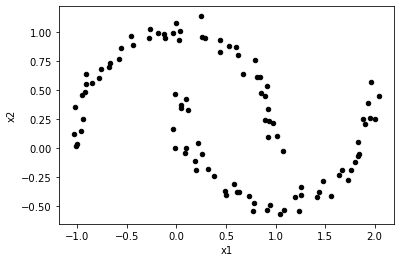

In [64]:
# TYPE YOUR CODE HERE
moons = pd.read_csv("../data/two_moons.csv")
moons.plot.scatter(x="x1", y="x2", color="k")

**Exercise 4.** The code below reads in the "satellite" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What should the two clusters be _intuitively_? What will the clusters be if you ask $k$-means to cluster this data into 2 clusters? Once you have a hypothesis, test it out by running $k$-means on this dataset.

<AxesSubplot:xlabel='x1', ylabel='x2'>

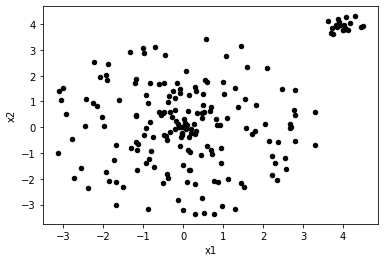

In [66]:
# TYPE YOUR CODE HERE
satellite = pd.read_csv("../data/satellite.csv")
satellite.plot.scatter(x="x1", y="x2", color="k")